# 2. Extract information from the following web URL using BeautifulSoup library:


In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
# locate web site to start getting info
url = 'https://www.storynory.com/fox-and-the-crow/'

html = requests.get(url)

soup = BeautifulSoup(html.text)


In [3]:
# Pass a list as a parameter to the find_all function.
# The following code returns all 'script', 'style', 'header', 'footer', 'form' tags in an HTML document.
script_tag = soup.find_all(['script', 'style', 'header', 'footer', 'form'])

# The extract function removes the tags from the soup object.
for script in script_tag:
    script.extract()

# Set text unit combining to '\n' (line feed).
# Remove spaces from the beginning and end of each text unit.
content = soup.get_text('\n', strip=True)
print(content)    

The Fox and the Crow - Storynory
Original Stories
Fairytales
Classic Audio Books
Educational Stories
Myths and World Stories
Junior Stories
Poems and Music
X
Home
Storynory
Menu
Original
fairytales
Classic Authors
Myths & World
Educational
Poems & Music
⟲
⟳
seek
00.00.00
00.00.00
loading
Download
I bet you can’t guess what I like to eat best of all? Yes, I knew that you would say that foxes like to eat hens best, and stolen ones at that. I don’t mind admitting that I wouldn’t ever say no to a nice fat chicken wing once in a while. But not many people know that what foxes appreciate even more than chicken, is a nice piece of cheese once in a while.
Well today I ate a wonderfully rich and creamy slice of cheddar for my breakfast. It was kindly given to me by a beautiful black-feathered bird whose voice is even more wonderful than her looks. No, I don’t mean a sky-lark, or a fancy bird of paradise. I’m talking about Miss Crow, up in that tree.
It was a fine bright morning, and I was follo

# Apply this to a subset of the paragraphs extracted from the page

## 1. Tokenizing

In [8]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
nltk.download('punkt') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
#Tokenize the text by sentences :
sentences = sent_tokenize(content)

#Show the number of sentences in the story
print(len(sentences))

#Display the sentences
sentences

26


['The Fox and the Crow - Storynory\nOriginal Stories\nFairytales\nClassic Audio Books\nEducational Stories\nMyths and World Stories\nJunior Stories\nPoems and Music\nX\nHome\nStorynory\nMenu\nOriginal\nfairytales\nClassic Authors\nMyths & World\nEducational\nPoems & Music\n⟲\n⟳\nseek\n00.00.00\n00.00.00\nloading\nDownload\nI bet you can’t guess what I like to eat best of all?',
 'Yes, I knew that you would say that foxes like to eat hens best, and stolen ones at that.',
 'I don’t mind admitting that I wouldn’t ever say no to a nice fat chicken wing once in a while.',
 'But not many people know that what foxes appreciate even more than chicken, is a nice piece of cheese once in a while.',
 'Well today I ate a wonderfully rich and creamy slice of cheddar for my breakfast.',
 'It was kindly given to me by a beautiful black-feathered bird whose voice is even more wonderful than her looks.',
 'No, I don’t mean a sky-lark, or a fancy bird of paradise.',
 'I’m talking about Miss Crow, up in t

In [12]:
#Tokenize the text by word :
words = word_tokenize(content)

#Display number of words in the story
print(len(words))
print("\n")

#Display the words used in the story
print(words)

651


['The', 'Fox', 'and', 'the', 'Crow', '-', 'Storynory', 'Original', 'Stories', 'Fairytales', 'Classic', 'Audio', 'Books', 'Educational', 'Stories', 'Myths', 'and', 'World', 'Stories', 'Junior', 'Stories', 'Poems', 'and', 'Music', 'X', 'Home', 'Storynory', 'Menu', 'Original', 'fairytales', 'Classic', 'Authors', 'Myths', '&', 'World', 'Educational', 'Poems', '&', 'Music', '⟲', '⟳', 'seek', '00.00.00', '00.00.00', 'loading', 'Download', 'I', 'bet', 'you', 'can', '’', 't', 'guess', 'what', 'I', 'like', 'to', 'eat', 'best', 'of', 'all', '?', 'Yes', ',', 'I', 'knew', 'that', 'you', 'would', 'say', 'that', 'foxes', 'like', 'to', 'eat', 'hens', 'best', ',', 'and', 'stolen', 'ones', 'at', 'that', '.', 'I', 'don', '’', 't', 'mind', 'admitting', 'that', 'I', 'wouldn', '’', 't', 'ever', 'say', 'no', 'to', 'a', 'nice', 'fat', 'chicken', 'wing', 'once', 'in', 'a', 'while', '.', 'But', 'not', 'many', 'people', 'know', 'that', 'what', 'foxes', 'appreciate', 'even', 'more', 'than', 'chicken', ',',

## 2. Part of Speech tagging

In [19]:
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [14]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [15]:
nltk.help.upenn_tagset('CC')
nltk.help.upenn_tagset('JJ')

CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [16]:
# need to convert the list to a string object by wrapping it in the str() operator
import re

#replace each non-letter with empty string
x = re.sub('[^a-zA-Z]', ' ', str(words))

#display results
print(x)

  The    Fox    and    the    Crow         Storynory    Original    Stories    Fairytales    Classic    Audio    Books    Educational    Stories    Myths    and    World    Stories    Junior    Stories    Poems    and    Music    X    Home    Storynory    Menu    Original    fairytales    Classic    Authors    Myths         World    Educational    Poems         Music              seek                            loading    Download    I    bet    you    can         t    guess    what    I    like    to    eat    best    of    all         Yes         I    knew    that    you    would    say    that    foxes    like    to    eat    hens    best         and    stolen    ones    at    that         I    don         t    mind    admitting    that    I    wouldn         t    ever    say    no    to    a    nice    fat    chicken    wing    once    in    a    while         But    not    many    people    know    that    what    foxes    appreciate    even    more    than    chicken         is  

In [17]:
#Word tokenize the new text
text = nltk.word_tokenize(x)
text

['The',
 'Fox',
 'and',
 'the',
 'Crow',
 'Storynory',
 'Original',
 'Stories',
 'Fairytales',
 'Classic',
 'Audio',
 'Books',
 'Educational',
 'Stories',
 'Myths',
 'and',
 'World',
 'Stories',
 'Junior',
 'Stories',
 'Poems',
 'and',
 'Music',
 'X',
 'Home',
 'Storynory',
 'Menu',
 'Original',
 'fairytales',
 'Classic',
 'Authors',
 'Myths',
 'World',
 'Educational',
 'Poems',
 'Music',
 'seek',
 'loading',
 'Download',
 'I',
 'bet',
 'you',
 'can',
 't',
 'guess',
 'what',
 'I',
 'like',
 'to',
 'eat',
 'best',
 'of',
 'all',
 'Yes',
 'I',
 'knew',
 'that',
 'you',
 'would',
 'say',
 'that',
 'foxes',
 'like',
 'to',
 'eat',
 'hens',
 'best',
 'and',
 'stolen',
 'ones',
 'at',
 'that',
 'I',
 'don',
 't',
 'mind',
 'admitting',
 'that',
 'I',
 'wouldn',
 't',
 'ever',
 'say',
 'no',
 'to',
 'a',
 'nice',
 'fat',
 'chicken',
 'wing',
 'once',
 'in',
 'a',
 'while',
 'But',
 'not',
 'many',
 'people',
 'know',
 'that',
 'what',
 'foxes',
 'appreciate',
 'even',
 'more',
 'than',
 'chi

In [20]:
#Tag the Parts of Speech for the given words in the text
tagged = nltk.pos_tag(text)
tagged

[('The', 'DT'),
 ('Fox', 'NNP'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('Crow', 'NNP'),
 ('Storynory', 'NNP'),
 ('Original', 'NNP'),
 ('Stories', 'NNP'),
 ('Fairytales', 'NNP'),
 ('Classic', 'NNP'),
 ('Audio', 'NNP'),
 ('Books', 'NNP'),
 ('Educational', 'NNP'),
 ('Stories', 'NNP'),
 ('Myths', 'NNP'),
 ('and', 'CC'),
 ('World', 'NNP'),
 ('Stories', 'NNP'),
 ('Junior', 'NNP'),
 ('Stories', 'NNP'),
 ('Poems', 'NNP'),
 ('and', 'CC'),
 ('Music', 'NNP'),
 ('X', 'NNP'),
 ('Home', 'NNP'),
 ('Storynory', 'NNP'),
 ('Menu', 'NNP'),
 ('Original', 'NNP'),
 ('fairytales', 'NNS'),
 ('Classic', 'JJ'),
 ('Authors', 'NNPS'),
 ('Myths', 'NNP'),
 ('World', 'NNP'),
 ('Educational', 'NNP'),
 ('Poems', 'NNP'),
 ('Music', 'NNP'),
 ('seek', 'NN'),
 ('loading', 'VBG'),
 ('Download', 'NNP'),
 ('I', 'PRP'),
 ('bet', 'VBP'),
 ('you', 'PRP'),
 ('can', 'MD'),
 ('t', 'VB'),
 ('guess', 'VB'),
 ('what', 'WP'),
 ('I', 'PRP'),
 ('like', 'VBP'),
 ('to', 'TO'),
 ('eat', 'VB'),
 ('best', 'JJS'),
 ('of', 'IN'),
 ('all', 'DT'),
 (

## 3. Stemming

In [40]:
#Import stemming library :
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

porter = PorterStemmer()

Stem the text with the Porter Stemmer

In [44]:
#Stem the given text
for w in text:
    print(porter.stem(w))

the
fox
and
the
crow
storynori
origin
stori
fairytal
classic
audio
book
educ
stori
myth
and
world
stori
junior
stori
poem
and
music
X
home
storynori
menu
origin
fairytal
classic
author
myth
world
educ
poem
music
seek
load
download
I
bet
you
can
t
guess
what
I
like
to
eat
best
of
all
ye
I
knew
that
you
would
say
that
fox
like
to
eat
hen
best
and
stolen
one
at
that
I
don
t
mind
admit
that
I
wouldn
t
ever
say
no
to
a
nice
fat
chicken
wing
onc
in
a
while
but
not
mani
peopl
know
that
what
fox
appreci
even
more
than
chicken
is
a
nice
piec
of
chees
onc
in
a
while
well
today
I
ate
a
wonder
rich
and
creami
slice
of
cheddar
for
my
breakfast
It
wa
kindli
given
to
me
by
a
beauti
black
feather
bird
whose
voic
is
even
more
wonder
than
her
look
No
I
don
t
mean
a
sky
lark
or
a
fanci
bird
of
paradis
I
m
talk
about
miss
crow
up
in
that
tree
It
wa
a
fine
bright
morn
and
I
wa
follow
my
sharp
nose
through
the
wood
in
search
of
a
bite
to
eat
when
I
caught
a
cheesi
smell
on
the
breez
I
look
up
into
the
tree


Stem the text with the Snowball Stemmer

In [43]:
#Show what languages are compatible with the Snowball Stemmer
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [45]:
# SnowballStemmer
snowball = SnowballStemmer("english")

#Stem the given text
for w in text:
    print(snowball.stem(w))

the
fox
and
the
crow
storynori
origin
stori
fairytal
classic
audio
book
educ
stori
myth
and
world
stori
junior
stori
poem
and
music
x
home
storynori
menu
origin
fairytal
classic
author
myth
world
educ
poem
music
seek
load
download
i
bet
you
can
t
guess
what
i
like
to
eat
best
of
all
yes
i
knew
that
you
would
say
that
fox
like
to
eat
hen
best
and
stolen
one
at
that
i
don
t
mind
admit
that
i
wouldn
t
ever
say
no
to
a
nice
fat
chicken
wing
onc
in
a
while
but
not
mani
peopl
know
that
what
fox
appreci
even
more
than
chicken
is
a
nice
piec
of
chees
onc
in
a
while
well
today
i
ate
a
wonder
rich
and
creami
slice
of
cheddar
for
my
breakfast
it
was
kind
given
to
me
by
a
beauti
black
feather
bird
whose
voic
is
even
more
wonder
than
her
look
no
i
don
t
mean
a
sky
lark
or
a
fanci
bird
of
paradis
i
m
talk
about
miss
crow
up
in
that
tree
it
was
a
fine
bright
morn
and
i
was
follow
my
sharp
nose
through
the
wood
in
search
of
a
bite
to
eat
when
i
caught
a
cheesi
smell
on
the
breez
i
look
up
into
the
tre

Stem the text with the Lancaster Stemmer

In [47]:
# LancasterStemmer
lStemmer = LancasterStemmer()

#Stem the given text
for w in text:
    print(lStemmer.stem(w))

the
fox
and
the
crow
storyn
origin
story
fairyt
class
audio
book
educ
story
myth
and
world
story
juny
story
poem
and
mus
x
hom
storyn
menu
origin
fairyt
class
auth
myth
world
educ
poem
mus
seek
load
download
i
bet
you
can
t
guess
what
i
lik
to
eat
best
of
al
ye
i
knew
that
you
would
say
that
fox
lik
to
eat
hen
best
and
stol
on
at
that
i
don
t
mind
admit
that
i
wouldn
t
ev
say
no
to
a
nic
fat
chick
wing
ont
in
a
whil
but
not
many
peopl
know
that
what
fox
apprecy
ev
mor
than
chick
is
a
nic
piec
of
chees
ont
in
a
whil
wel
today
i
at
a
wond
rich
and
creamy
slic
of
chedd
for
my
breakfast
it
was
kind
giv
to
me
by
a
beauty
black
feath
bird
whos
voic
is
ev
mor
wond
than
her
look
no
i
don
t
mean
a
sky
lark
or
a
fant
bird
of
parad
i
m
talk
about
miss
crow
up
in
that
tre
it
was
a
fin
bright
morn
and
i
was
follow
my
sharp
nos
through
the
wood
in
search
of
a
bit
to
eat
when
i
caught
a
cheesy
smel
on
the
breez
i
look
up
into
the
tre
and
ther
on
the
branch
i
saw
miss
crow
look
terr
pleas
with
herself

## 4. Lemmatization

In [51]:
# import library 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Lemmatize the story

In [52]:
# lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the given text 
for w in text:
    print(lemmatizer.lemmatize(w))

The
Fox
and
the
Crow
Storynory
Original
Stories
Fairytales
Classic
Audio
Books
Educational
Stories
Myths
and
World
Stories
Junior
Stories
Poems
and
Music
X
Home
Storynory
Menu
Original
fairytale
Classic
Authors
Myths
World
Educational
Poems
Music
seek
loading
Download
I
bet
you
can
t
guess
what
I
like
to
eat
best
of
all
Yes
I
knew
that
you
would
say
that
fox
like
to
eat
hen
best
and
stolen
one
at
that
I
don
t
mind
admitting
that
I
wouldn
t
ever
say
no
to
a
nice
fat
chicken
wing
once
in
a
while
But
not
many
people
know
that
what
fox
appreciate
even
more
than
chicken
is
a
nice
piece
of
cheese
once
in
a
while
Well
today
I
ate
a
wonderfully
rich
and
creamy
slice
of
cheddar
for
my
breakfast
It
wa
kindly
given
to
me
by
a
beautiful
black
feathered
bird
whose
voice
is
even
more
wonderful
than
her
look
No
I
don
t
mean
a
sky
lark
or
a
fancy
bird
of
paradise
I
m
talking
about
Miss
Crow
up
in
that
tree
It
wa
a
fine
bright
morning
and
I
wa
following
my
sharp
nose
through
the
wood
in
search
of
a
bit

## 5. Trigram

In [53]:
# import library for N-gram
from nltk.util import ngrams
from collections import Counter

In [54]:
# use tokenized words (already done above)
text

['The',
 'Fox',
 'and',
 'the',
 'Crow',
 'Storynory',
 'Original',
 'Stories',
 'Fairytales',
 'Classic',
 'Audio',
 'Books',
 'Educational',
 'Stories',
 'Myths',
 'and',
 'World',
 'Stories',
 'Junior',
 'Stories',
 'Poems',
 'and',
 'Music',
 'X',
 'Home',
 'Storynory',
 'Menu',
 'Original',
 'fairytales',
 'Classic',
 'Authors',
 'Myths',
 'World',
 'Educational',
 'Poems',
 'Music',
 'seek',
 'loading',
 'Download',
 'I',
 'bet',
 'you',
 'can',
 't',
 'guess',
 'what',
 'I',
 'like',
 'to',
 'eat',
 'best',
 'of',
 'all',
 'Yes',
 'I',
 'knew',
 'that',
 'you',
 'would',
 'say',
 'that',
 'foxes',
 'like',
 'to',
 'eat',
 'hens',
 'best',
 'and',
 'stolen',
 'ones',
 'at',
 'that',
 'I',
 'don',
 't',
 'mind',
 'admitting',
 'that',
 'I',
 'wouldn',
 't',
 'ever',
 'say',
 'no',
 'to',
 'a',
 'nice',
 'fat',
 'chicken',
 'wing',
 'once',
 'in',
 'a',
 'while',
 'But',
 'not',
 'many',
 'people',
 'know',
 'that',
 'what',
 'foxes',
 'appreciate',
 'even',
 'more',
 'than',
 'chi

In [57]:
# Form the trigrams for the given text
trigrams = ngrams(text,3)

In [58]:
# Display the trigrams and how many times each appear in the text
print(Counter(trigrams))

Counter({('like', 'to', 'eat'): 2, ('I', 'don', 't'): 2, ('once', 'in', 'a'): 2, ('in', 'a', 'while'): 2, ('piece', 'of', 'cheese'): 2, ('a', 'charming', 'creature'): 2, ('I', 'could', 'see'): 2, ('that', 'Miss', 'Crow'): 2, ('Bertie', 'and', 'Beatrice'): 2, ('and', 'Beatrice', 's'): 2, ('Beatrice', 's', 'Dreams'): 2, ('The', 'Fox', 'and'): 1, ('Fox', 'and', 'the'): 1, ('and', 'the', 'Crow'): 1, ('the', 'Crow', 'Storynory'): 1, ('Crow', 'Storynory', 'Original'): 1, ('Storynory', 'Original', 'Stories'): 1, ('Original', 'Stories', 'Fairytales'): 1, ('Stories', 'Fairytales', 'Classic'): 1, ('Fairytales', 'Classic', 'Audio'): 1, ('Classic', 'Audio', 'Books'): 1, ('Audio', 'Books', 'Educational'): 1, ('Books', 'Educational', 'Stories'): 1, ('Educational', 'Stories', 'Myths'): 1, ('Stories', 'Myths', 'and'): 1, ('Myths', 'and', 'World'): 1, ('and', 'World', 'Stories'): 1, ('World', 'Stories', 'Junior'): 1, ('Stories', 'Junior', 'Stories'): 1, ('Junior', 'Stories', 'Poems'): 1, ('Stories', 'P

## 6. Named Entity Recognition

In [63]:
# import library
from nltk import wordpunct_tokenize, pos_tag, ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [64]:
ner = ne_chunk(pos_tag(wordpunct_tokenize(x)))

In [69]:
# check ner
print(ner)

(S
  The/DT
  (PERSON Fox/NNP)
  and/CC
  the/DT
  (ORGANIZATION Crow/NNP)
  Storynory/NNP
  Original/NNP
  Stories/NNP
  Fairytales/NNP
  (PERSON
    Classic/NNP
    Audio/NNP
    Books/NNP
    Educational/NNP
    Stories/NNP
    Myths/NNP)
  and/CC
  World/NNP
  Stories/NNP
  Junior/NNP
  Stories/NNP
  Poems/NNP
  and/CC
  (PERSON
    Music/NNP
    X/NNP
    Home/NNP
    Storynory/NNP
    Menu/NNP
    Original/NNP)
  fairytales/NNS
  (ORGANIZATION Classic/JJ Authors/NNPS Myths/NNP)
  World/NNP
  Educational/NNP
  Poems/NNP
  Music/NNP
  seek/NN
  loading/VBG
  Download/NNP
  I/PRP
  bet/VBP
  you/PRP
  can/MD
  t/VB
  guess/VB
  what/WP
  I/PRP
  like/VBP
  to/TO
  eat/VB
  best/JJS
  of/IN
  all/DT
  Yes/NNP
  I/PRP
  knew/VBD
  that/IN
  you/PRP
  would/MD
  say/VB
  that/IN
  foxes/NNS
  like/IN
  to/TO
  eat/VB
  hens/NNS
  best/JJS
  and/CC
  stolen/VBN
  ones/NNS
  at/IN
  that/DT
  I/PRP
  don/VBP
  t/JJ
  mind/NN
  admitting/VBG
  that/IN
  I/PRP
  wouldn/VBP
  t/JJ
  ever/RB

In [68]:
# Check the type for the ner
print(type(ner))

<class 'nltk.tree.Tree'>


In [70]:
# use for loop to execute ner all the words 
for t in ner:
    print(t)

('The', 'DT')
(PERSON Fox/NNP)
('and', 'CC')
('the', 'DT')
(ORGANIZATION Crow/NNP)
('Storynory', 'NNP')
('Original', 'NNP')
('Stories', 'NNP')
('Fairytales', 'NNP')
(PERSON
  Classic/NNP
  Audio/NNP
  Books/NNP
  Educational/NNP
  Stories/NNP
  Myths/NNP)
('and', 'CC')
('World', 'NNP')
('Stories', 'NNP')
('Junior', 'NNP')
('Stories', 'NNP')
('Poems', 'NNP')
('and', 'CC')
(PERSON Music/NNP X/NNP Home/NNP Storynory/NNP Menu/NNP Original/NNP)
('fairytales', 'NNS')
(ORGANIZATION Classic/JJ Authors/NNPS Myths/NNP)
('World', 'NNP')
('Educational', 'NNP')
('Poems', 'NNP')
('Music', 'NNP')
('seek', 'NN')
('loading', 'VBG')
('Download', 'NNP')
('I', 'PRP')
('bet', 'VBP')
('you', 'PRP')
('can', 'MD')
('t', 'VB')
('guess', 'VB')
('what', 'WP')
('I', 'PRP')
('like', 'VBP')
('to', 'TO')
('eat', 'VB')
('best', 'JJS')
('of', 'IN')
('all', 'DT')
('Yes', 'NNP')
('I', 'PRP')
('knew', 'VBD')
('that', 'IN')
('you', 'PRP')
('would', 'MD')
('say', 'VB')
('that', 'IN')
('foxes', 'NNS')
('like', 'IN')
('to', 

## 7. Plot the Frequencies of words after removing the stop words.

In [84]:
#Import required libraries :
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [85]:
#Empty list to store words:
words_no_punc = []

#Removing punctuation marks :
for w in words:
    if w.isalpha():
        words_no_punc.append(w.lower())

#Print the words without punctution marks :
print(words_no_punc)

['the', 'fox', 'and', 'the', 'crow', 'storynory', 'original', 'stories', 'fairytales', 'classic', 'audio', 'books', 'educational', 'stories', 'myths', 'and', 'world', 'stories', 'junior', 'stories', 'poems', 'and', 'music', 'x', 'home', 'storynory', 'menu', 'original', 'fairytales', 'classic', 'authors', 'myths', 'world', 'educational', 'poems', 'music', 'seek', 'loading', 'download', 'i', 'bet', 'you', 'can', 't', 'guess', 'what', 'i', 'like', 'to', 'eat', 'best', 'of', 'all', 'yes', 'i', 'knew', 'that', 'you', 'would', 'say', 'that', 'foxes', 'like', 'to', 'eat', 'hens', 'best', 'and', 'stolen', 'ones', 'at', 'that', 'i', 'don', 't', 'mind', 'admitting', 'that', 'i', 'wouldn', 't', 'ever', 'say', 'no', 'to', 'a', 'nice', 'fat', 'chicken', 'wing', 'once', 'in', 'a', 'while', 'but', 'not', 'many', 'people', 'know', 'that', 'what', 'foxes', 'appreciate', 'even', 'more', 'than', 'chicken', 'is', 'a', 'nice', 'piece', 'of', 'cheese', 'once', 'in', 'a', 'while', 'well', 'today', 'i', 'ate'

In [86]:
#Show how many words are stored
print(len(words_no_punc))

557


In [87]:
#Frequency distribution :
fdist = FreqDist(words_no_punc)

fdist.most_common(10)

[('i', 27),
 ('the', 19),
 ('and', 18),
 ('that', 16),
 ('a', 15),
 ('to', 14),
 ('her', 10),
 ('of', 9),
 ('crow', 8),
 ('my', 8)]

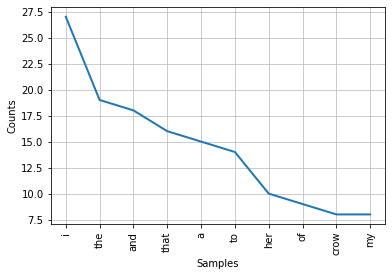

In [88]:
#Plot the most common words on grpah:
fdist.plot(10)

In [89]:
#List of stopwords
stop = stopwords.words('english')

In [90]:
#Empty list to store clean words :
clean_words = []

#Identify and store words that are not stop words
for w in words_no_punc:
    if w not in stop:
        clean_words.append(w)

#Show new word list   
print(clean_words)

['fox', 'crow', 'storynory', 'original', 'stories', 'fairytales', 'classic', 'audio', 'books', 'educational', 'stories', 'myths', 'world', 'stories', 'junior', 'stories', 'poems', 'music', 'x', 'home', 'storynory', 'menu', 'original', 'fairytales', 'classic', 'authors', 'myths', 'world', 'educational', 'poems', 'music', 'seek', 'loading', 'download', 'bet', 'guess', 'like', 'eat', 'best', 'yes', 'knew', 'would', 'say', 'foxes', 'like', 'eat', 'hens', 'best', 'stolen', 'ones', 'mind', 'admitting', 'ever', 'say', 'nice', 'fat', 'chicken', 'wing', 'many', 'people', 'know', 'foxes', 'appreciate', 'even', 'chicken', 'nice', 'piece', 'cheese', 'well', 'today', 'ate', 'wonderfully', 'rich', 'creamy', 'slice', 'cheddar', 'breakfast', 'kindly', 'given', 'beautiful', 'bird', 'whose', 'voice', 'even', 'wonderful', 'looks', 'mean', 'fancy', 'bird', 'paradise', 'talking', 'miss', 'crow', 'tree', 'fine', 'bright', 'morning', 'following', 'sharp', 'nose', 'woods', 'search', 'bite', 'eat', 'caught', '

In [91]:
#Display how many words are in the list now
print(len(clean_words))

281


In [92]:
#Make a frequency distribution for the new word list
fdist = FreqDist(clean_words)

fdist.most_common(10)

[('crow', 8),
 ('miss', 7),
 ('stories', 5),
 ('could', 5),
 ('cheese', 4),
 ('beak', 4),
 ('bertie', 4),
 ('music', 3),
 ('like', 3),
 ('eat', 3)]

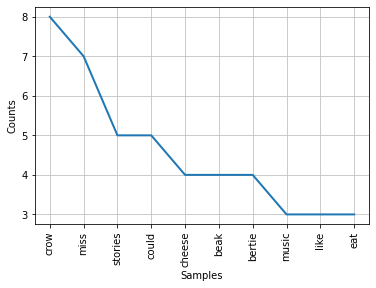

In [93]:
#Plot the most common words on grpah:
fdist.plot(10)